In [107]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [108]:
# function to display an image
def display_image(img,s):
    plt.imshow(img)
    plt.title(s)

In [109]:
# function to convert an image into greyscale using opencv
def col_to_greyscale_cv2(img):
    dim = img.shape
    n,m,c = dim
    for i in range(n-1):
        for j in range(m-1):
            r,g,b = img[i,j]
            avg = int((int(r)+int(b)+int(g))/3.0)
            img[i,j] = (avg,avg,avg)
    return img

In [110]:
# function to save an image
def save_image(img,s):
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    name = './../Images/Output_Images/'+s+'.jpg'
    cv2.imwrite(name,img)

In [111]:
def resize_image(image, new_dimensions):
    height, width = image.shape[:2]
    n_width, n_height = new_dimensions
    resized_image = np.zeros((n_height, n_width, 3), dtype=np.uint8)

    # getting the ratio of new_dim/old_dim
    x_ratio = float(width - 1) / n_width
    y_ratio = float(height - 1) / n_height

    for i in range(n_height):
        for j in range(n_width):
            x = int(j * x_ratio)
            y = int(i * y_ratio)
            x_diff = (j * x_ratio) - x
            y_diff = (i * y_ratio) - y

            pixel1 = image[y, x] * (1 - x_diff) * (1 - y_diff)
            pixel2 = image[y, x + 1] * x_diff * (1 - y_diff)
            pixel3 = image[y + 1, x] * (1 - x_diff) * y_diff
            pixel4 = image[y + 1, x + 1] * x_diff * y_diff

            resized_pixel = pixel1 + pixel2 + pixel3 + pixel4
            resized_image[i, j] = resized_pixel

    return resized_image


In [112]:
# function to puts img2 as background over img1 (with green screen)
def put_background(img1,img2,gs):
    

    height1, width1 = img1.shape[0],img1.shape[1]
    height2, width2 = img2.shape[0],img2.shape[1]
    width = min(width1,width2)
    height = min(height1,height2)
    resized_dimensions = (width,height) 
    
    # make the dimensions of the 2 images same
    img1 = resize_image(img1,resized_dimensions)
    img2 = resize_image(img2,resized_dimensions)

    
    # if the green percentage > gs then put the corresponding img2 pixel
    for i in range(height):
        for j in range(width):
            tot = (int(img1[i,j][0]) + int(img1[i,j][1]) + int(img1[i,j][2]))
            rps = (img1[i,j][0]*100.0)/(float)(tot+1)
            gps = (img1[i,j][1]*100.0)/(float)(tot+1)
            bps = (img1[i,j][2]*100.0)/(float)(tot+1)
            
            if(gps>=gs):
                img1[i,j]=img2[i,j]

    return img1          
    

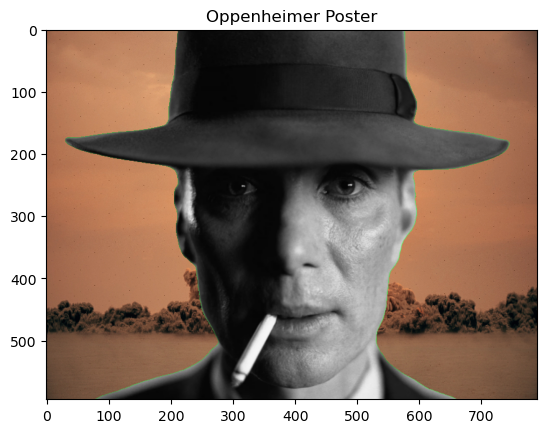

In [81]:

loc1 = './../Images/oppenheimer.png'
loc2 = './../Images/atomicbomb.jpg'

img1 = cv2.imread(loc1)
img2 = cv2.imread(loc2)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

poster = put_background(img1,img2,(60))

display_image(poster,'Oppenheimer Poster')

save_image(poster,'q1/q1_1')

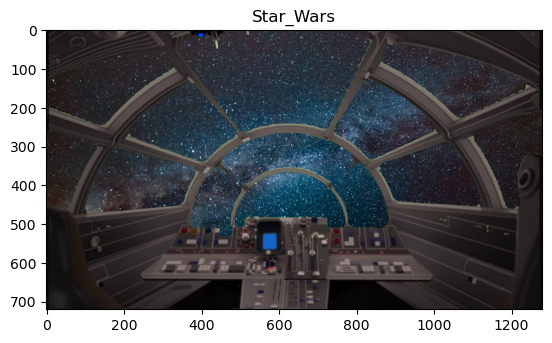

In [113]:

loc1 = './../Images/ship.jpg'
loc2 = './../Images/space.jpg'

img1 = cv2.imread(loc1)
img2 = cv2.imread(loc2)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)


poster = put_background(img1,img2,(37))

display_image(poster,'Star_Wars')

save_image(poster,'q1/q1_2')

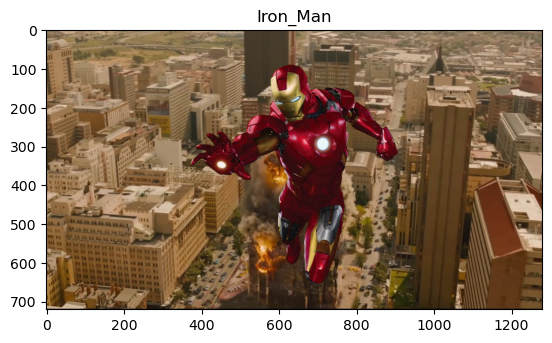

In [114]:

loc2 = './../Images/avenger.jpg'
loc1 = './../Images/iron_man.jpg'

img1 = cv2.imread(loc1)
img2 = cv2.imread(loc2)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)


poster = put_background(img1,img2,(40))

display_image(poster,'Iron_Man')

save_image(poster,'q1/q1_3')

In [115]:
def bitQuantizeImage(input_img,k):
    img = input_img
    num = 2**(8-k)
    img[...,0] = cv2.multiply(img[...,0], 1/num)
    img[...,1] = cv2.multiply(img[...,1], 1/num)
    img[...,2] = cv2.multiply(img[...,2], 1/num)
    img[...,0] = cv2.multiply(img[...,0], num)
    img[...,1] = cv2.multiply(img[...,1], num)
    img[...,2] = cv2.multiply(img[...,2], num)
    return img

In [116]:
# returns the kth bit-plane of the image
def getBitPlane(img,k):

    bit_plane = (img >> k) & 1
    bit_plane *= 255

    return bit_plane

In [117]:
# function to display images in 4x2 subplot
def display8Images(im1, im2, im3, im4,im5,im6,im7,im8,s):
    
    print(s)
    plt.figure(figsize=(14, 5))
    
    plt.subplot(2, 4, 1)
    plt.imshow(im1)
    
    plt.subplot(2, 4, 2)
    plt.imshow(im2)
    
    plt.subplot(2, 4, 3)
    plt.imshow(im3)
    
    plt.subplot(2, 4, 4)
    plt.imshow(im4)
    
    plt.subplot(2, 4, 5)
    plt.imshow(im5)
    
    plt.subplot(2, 4, 6)
    plt.imshow(im6)
    
    plt.subplot(2, 4, 7)
    plt.imshow(im7)
    
    plt.subplot(2, 4, 8)
    plt.imshow(im8)
    
    
    
    plt.show()

Images in decreasing order of quantization (8-bit to 1-bit)


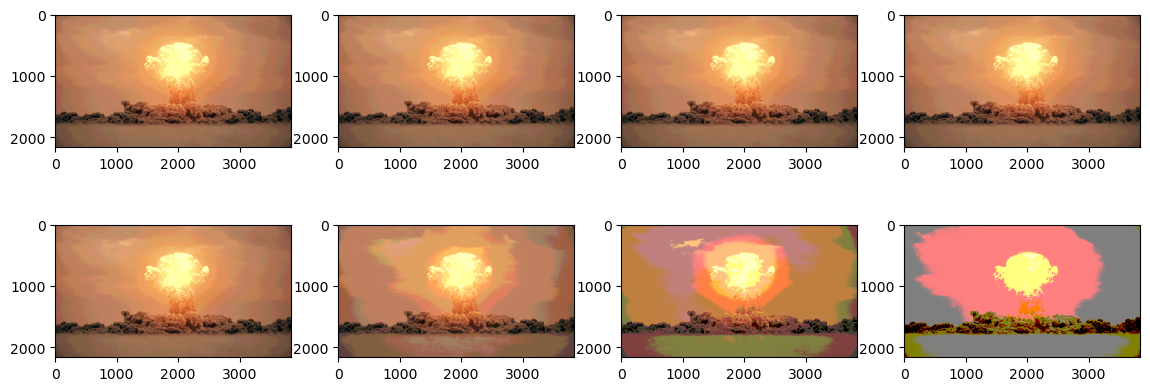

In [87]:
# part 2 - Quantization and bit-plane slicing

loc = './../Images/atomicbomb.jpg'

img = cv2.imread(loc)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img1 = cv2.imread(loc)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread(loc)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img3 = cv2.imread(loc)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
img4 = cv2.imread(loc)
img4 = cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)
img5 = cv2.imread(loc)
img5 = cv2.cvtColor(img5,cv2.COLOR_BGR2RGB)
img6 = cv2.imread(loc)
img6 = cv2.cvtColor(img6,cv2.COLOR_BGR2RGB)
img7 = cv2.imread(loc)
img7 = cv2.cvtColor(img7,cv2.COLOR_BGR2RGB)


img1 = bitQuantizeImage(img1,1)
img2 = bitQuantizeImage(img2,2)
img3 = bitQuantizeImage(img3,3)
img4 = bitQuantizeImage(img,4)
img5 = bitQuantizeImage(img,5)
img6 = bitQuantizeImage(img,6)
img7 = bitQuantizeImage(img,7)

display8Images(img,img7,img6,img5,img4,img3,img2,img1,'Images in decreasing order of quantization (8-bit to 1-bit)')


Bit Planes (0th-bit plane to 7th-bit plane)


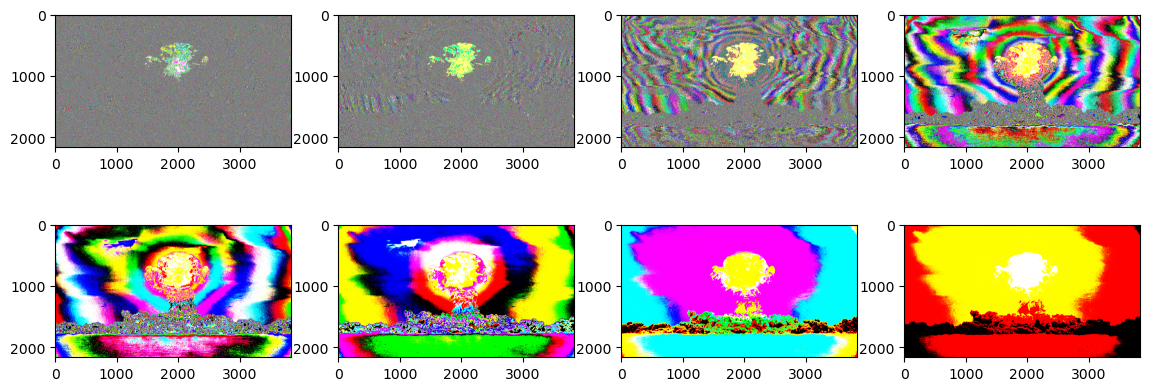

In [118]:
# part 2 - Quantization and bit-plane slicing

loc = './../Images/atomicbomb.jpg'

img0 = cv2.imread(loc)
img0 = cv2.cvtColor(img0,cv2.COLOR_BGR2RGB)
img1 = cv2.imread(loc)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread(loc)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img3 = cv2.imread(loc)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
img4 = cv2.imread(loc)
img4 = cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)
img5 = cv2.imread(loc)
img5 = cv2.cvtColor(img5,cv2.COLOR_BGR2RGB)
img6 = cv2.imread(loc)
img6 = cv2.cvtColor(img6,cv2.COLOR_BGR2RGB)
img7 = cv2.imread(loc)
img7 = cv2.cvtColor(img7,cv2.COLOR_BGR2RGB)


img0 = getBitPlane(img0,0)
img1 = getBitPlane(img1,1)
img2 = getBitPlane(img2,2)
img3 = getBitPlane(img3,3)
img4 = getBitPlane(img4,4)
img5 = getBitPlane(img5,5)
img6 = getBitPlane(img6,6)
img7 = getBitPlane(img7,7)


display8Images(img0,img1,img2,img3,img4,img5,img6,img7,'Bit Planes (0th-bit plane to 7th-bit plane)')


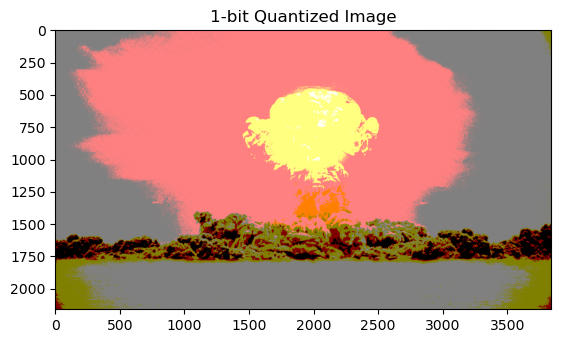

In [119]:
loc = './../Images/atomicbomb.jpg'

img = cv2.imread(loc)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

k = 1
img1 = bitQuantizeImage(img,k)
display_image(img1,str(k)+'-bit Quantized Image')


In [121]:
def contrast_stretching(img, a, b):
    if a >= b or a < 0 or b > 255:
        print("Invalid contrast range!!")
        return img

    min_val = np.min(img)
    max_val = np.max(img)

    stretched_image = ((img - min_val) * ((b - a) / (max_val - min_val))) + a
    stretched_image = np.clip(stretched_image, a, b).astype(np.uint8)

    return stretched_image

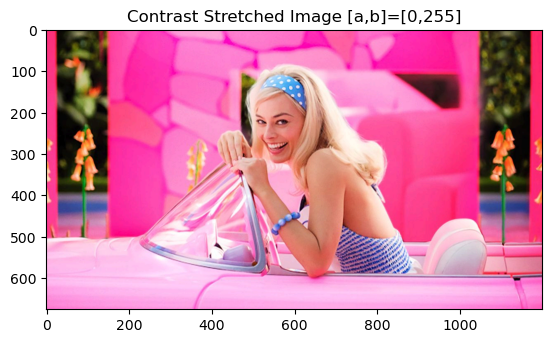

In [122]:
loc = './../Images/barbie_flat.png'

img = cv2.imread(loc)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

a = 0
b = 255
img1 = contrast_stretching(img,a,b)
display_image(img1,'Contrast Stretched Image [a,b]=['+str(a)+','+str(b)+']')
save_image(img1,'q3/Contrast_Stretched_barbie')


In [123]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_colorbar(img, k, s):


    # Reshape the image into a list of pixels
    pixels = img.reshape(-1, 3)

    # histogram of colors
    hist = np.histogramdd(pixels, bins=(256, 256, 256), range=((0, 256), (0, 256), (0, 256)))[0]

    # k most occuring colors
    most_frequent_colors = np.argpartition(hist.flatten(), -k)[-k:]
    most_frequent_colors = np.unravel_index(most_frequent_colors, hist.shape)

    colorbar = np.zeros((50, 50 * k, 3), dtype=np.uint8)

    for i, color_indices in enumerate(zip(*most_frequent_colors)):
        color = np.array(color_indices, dtype=np.uint8)
        colorbar[:, i * 50 : (i + 1) * 50, :] = color

    plt.imshow(colorbar)
    plt.axis('off')
    plt.title(str(s))
    plt.show()


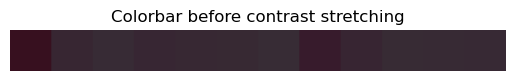

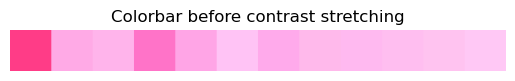

In [124]:
loc = './../Images/barbie_flat.png'

img = cv2.imread(loc)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img1 = contrast_stretching(img,0,255)
k = 12

plot_colorbar(img, k,'Colorbar before contrast stretching')
plot_colorbar(img1, k,'Colorbar before contrast stretching')


In [125]:
def histEqualization(img):

    # calculating the histogram of the image
    hist = np.zeros(256, dtype=int)
    for row in img:
        for pixel in row:
            hist[pixel] += 1

    # calculating the cdf of histogram of the image
    cdf = np.zeros(256, dtype=int)
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]

    # apply histogram equalization
    eq_img = np.zeros_like(img)
    # print(eq_img.shape)    
    n = img.shape[0] * img.shape[1]

    num = 255/n
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            eq_img[i, j] = int(cdf[img[i, j]] * num)
            # eq_img[i, j] = int(cdf[img[i, j]] / n)
            

    return eq_img



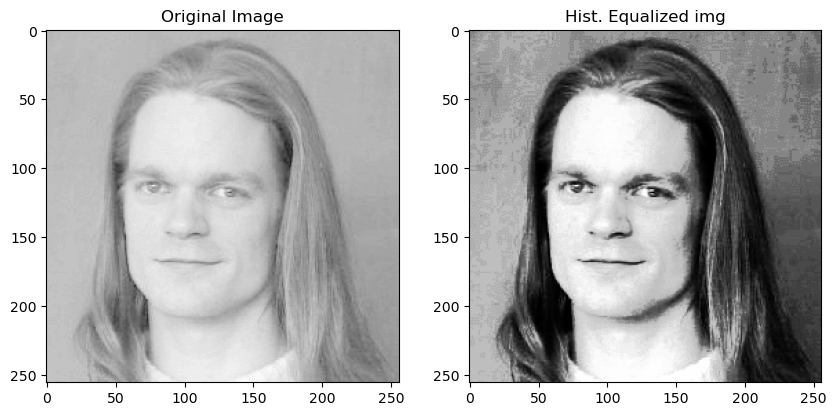

In [126]:
loc = './../Images/low.png'
img = cv2.imread(loc, cv2.IMREAD_GRAYSCALE)

equalized_img = histEqualization(img)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Hist. Equalized img')
plt.show()


In [127]:
def pwl_transform(A,B,image):
    # making a copy of the original image
    img = np.copy(image)
    # get the dimensions of the image
    height = img.shape[0]
    width = img.shape[1]
    
    # no. of PWL function pieces
    n = len(A)
    
    # iterating through all pixels and applying approproiate LT on Intensity value
    for i in range(height):
        for j in range(width):
            px = img[i,j]
            I = (int(px[0])+int(px[1])+int(px[2]))/3
            I = I/255
            for k in range(n):
                if(I>=A[k][0] and I<=A[k][1]):
                    I = B[k][0]*I + B[k][1]
                    break
            img[i,j] = [I*255,I*255,I*255]
            
    # return the transformed image
    return img

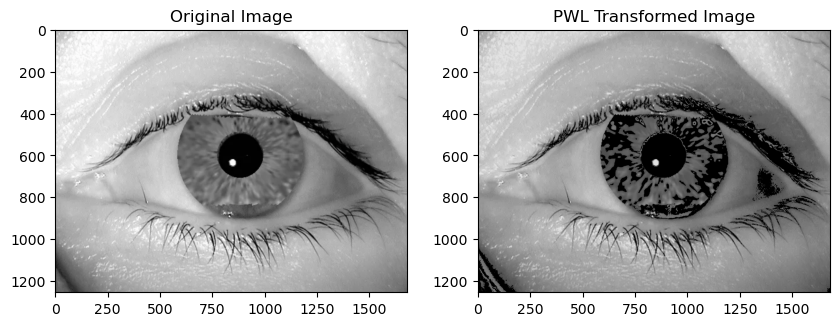

In [128]:
loc = './../Images/iris1.png'
img = cv2.imread(loc)
A = [(0.0,0.2),(0.2,0.3),(0.3,0.4),(0.4,1)]
B = [(0.0,0.0),(-1,0.7),(0.0,0.0),(1.0,-0.1)]
img1 = pwl_transform(A,B,img)


plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img1)
plt.title('PWL Transformed Image')
plt.show()



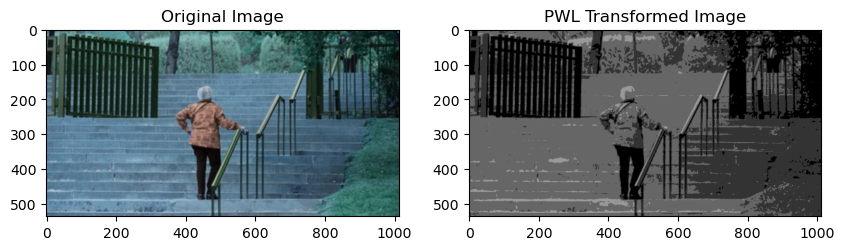

In [129]:
loc = './../Images/stairs2.png'
img = cv2.imread(loc)
A=[(0.0,0.2),(0.2,0.4),(0.4,0.6),(0.6,0.8),(0.8,1.0)] 
B=[(0.0,0.0),(0.0,0.2),(0.0,0.4),(0.0,0.6),(0.0,0.8)]
img1 = pwl_transform(A,B,img)


plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img1)
plt.title('PWL Transformed Image')
plt.show()



In [130]:
def plot_intensity_mapping(A, B):
    
    for a, b in zip(A, B):
        x1, x2 = a
        m, c = b
        
        x_values = [x / 255.0 for x in range(int(x1*255), int(x2*255)+1)]
        y_values = [(x * m + c) for x in x_values]
        plt.plot(x_values, y_values)
        
    plt.grid()



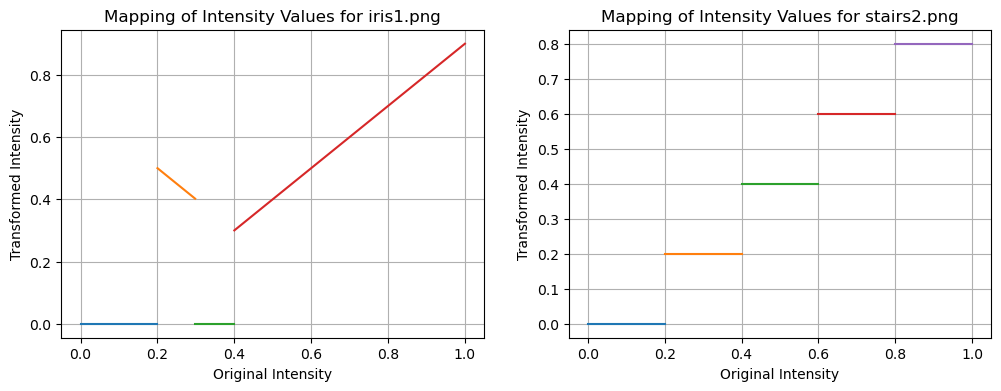

In [131]:

A_iris = [(0.0, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 1)]
B_iris = [(0.0, 0.0), (-1, 0.7), (0.0, 0.0), (1.0, -0.1)]

A_stairs = [(0.0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]
B_stairs = [(0.0, 0.0), (0.0, 0.2), (0.0, 0.4), (0.0, 0.6), (0.0, 0.8)]



plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('Mapping of Intensity Values for iris1.png')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plot_intensity_mapping(A_iris, B_iris)

plt.subplot(1, 2, 2)
plt.title(f'Mapping of Intensity Values for stairs2.png')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plot_intensity_mapping(A_stairs, B_stairs)

plt.show()



In [132]:
def getIntensityMap(img1,img2):
    height,width = img1.shape[0],img1.shape[1]
    # print(img1.shape,img2.shape,height,width)
    # creating a 256 sized list
    transform = [None]*256
    
    
    for i in range(height):
        for j in range(width):
            px1 = img1[i,j]
            s = int((int(px1[0])+int(px1[1])+int(px1[2]))/3)
            px2 = img2[i,j]
            r = int((int(px2[0])+int(px2[1])+int(px2[2]))/3)
            transform[s] = r
            
    return transform

In [133]:
def applyMapping(image,mp):
    img = np.copy(image)
    height,width = img.shape[0],img.shape[1]
    
    for i in range(height):
        for j in range(width):
            px = img[i,j]
            s = int((int(px[0])+int(px[1])+int(px[2]))/3)
            r = mp[s]
            img[i,j] = [r,r,r]
            
    return img
        

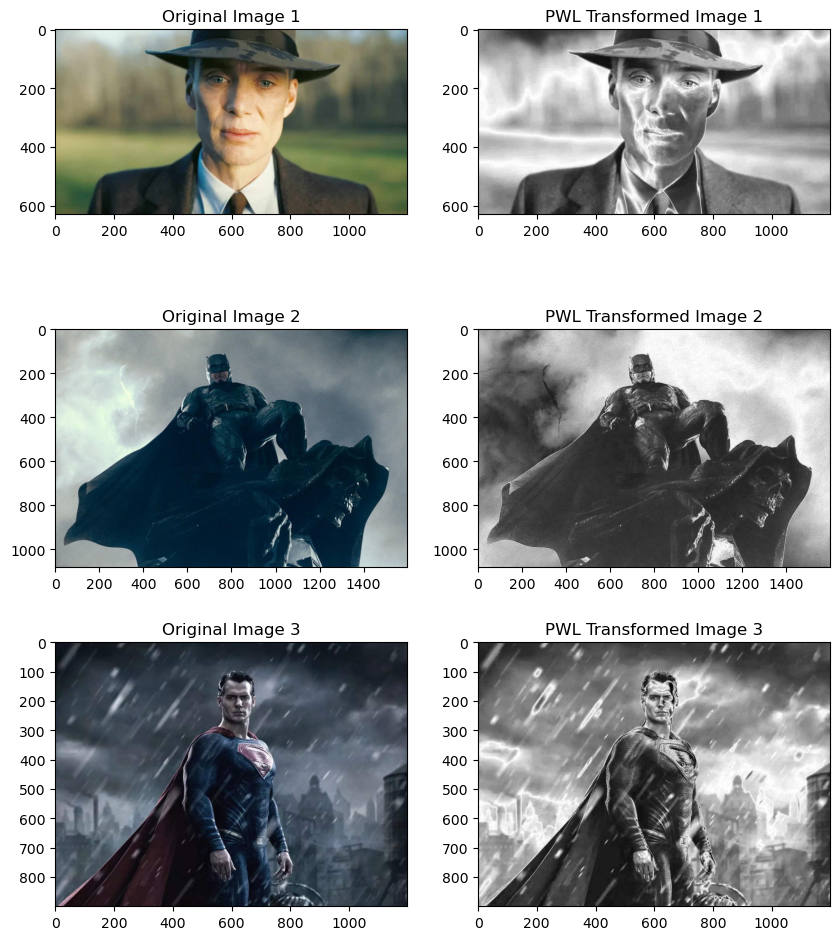

In [103]:

loc1 = './../Images/micro.jpg'
loc2 = './../Images/transformed.png'
img1 = cv2.imread(loc1)
img2 = cv2.imread(loc2)

mp = getIntensityMap(img1,img2)

# for 1st image
location1 = './../Images/oppenheimer.jpg'
image1 = cv2.imread(location1)
image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image1_transformed = applyMapping(image1,mp)

# for 2nd image
location2 = './../Images/batman.jpg'
image2 = cv2.imread(location2)
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
image2_transformed = applyMapping(image2,mp)

# for 3rd image
location3 = './../Images/superman.jpg'
image3 = cv2.imread(location3)
image3 = cv2.cvtColor(image3,cv2.COLOR_BGR2RGB)
image3_transformed = applyMapping(image3,mp)


# plotting all the images
plt.figure(figsize=(10, 12))

plt.subplot(3, 2, 1)
plt.imshow(image1)
plt.title('Original Image 1')
plt.subplot(3, 2, 2)
plt.imshow(image1_transformed)
plt.title('PWL Transformed Image 1')


plt.subplot(3, 2, 3)
plt.imshow(image2)
plt.title('Original Image 2')
plt.subplot(3, 2, 4)
plt.imshow(image2_transformed)
plt.title('PWL Transformed Image 2')


plt.subplot(3, 2, 5)
plt.imshow(image3)
plt.title('Original Image 3')
plt.subplot(3, 2, 6)
plt.imshow(image3_transformed)
plt.title('PWL Transformed Image 3')

plt.show()

In [134]:
def plot_list(mp):
    # Create x-axis values ranging from 0 to 255
    x_values = list(range(256))
    
    # Create the plot
    plt.figure(figsize=(6, 4))
    plt.plot(x_values, mp)
    
    # Set labels and title
    plt.ylabel('Transformed Intensity T(r)')
    plt.xlabel('Intensity r')
    plt.title('Transform Function Plot')
    plt.grid()
    
    # Show the plot
    plt.show()


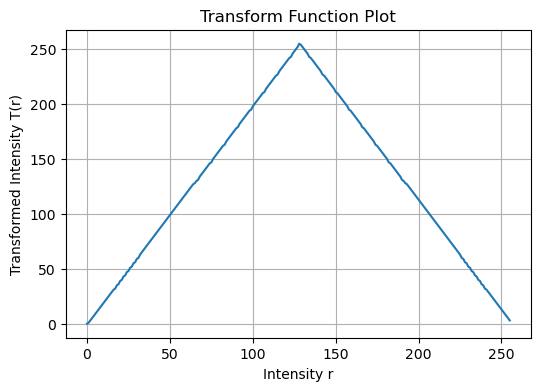

In [135]:

loc1 = './../Images/micro.jpg'
loc2 = './../Images/transformed.png'
img1 = cv2.imread(loc1)
img2 = cv2.imread(loc2)

mp = getIntensityMap(img1,img2)
plot_list(mp)